1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
import numpy as np
import numpy.random as npr
import pandas as pd
from scipy import linalg as la 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import wget

Covariance X: 
 [[ 0.99644596  0.95243531  2.94532723]
 [ 0.95243531 10.17278353 12.07765416]
 [ 2.94532723 12.07765416 17.96830862]] 

Eigenvalues:
 [2.70936266e+01+0.j 1.50597594e-15+0.j 2.04391154e+00+0.j] 

Eigenvectors:
 [[-0.11216357 -0.81649658  0.5663503 ]
 [-0.58147106 -0.40824829 -0.70372206]
 [-0.8057982   0.40824829  0.42897855]] 

U:
 [[-0.11185161  0.566412   -0.81649658]
 [-0.58185858 -0.70340168 -0.40824829]
 [-0.8055618   0.42942231  0.40824829]] 

S:
 [1.64803247e+02 4.52095710e+01 4.90458862e-14] 

V transpose:
 [[-3.92950504e-02 -1.21533141e-02 -1.76632764e-03 ...  6.39272391e-03
  -7.11537757e-03 -1.21285070e-03]
 [-2.90326811e-02 -4.07846330e-02  3.48272996e-02 ...  1.84048721e-02
   2.99801183e-02 -1.63896041e-02]
 [ 4.05265034e-01  9.05063427e-01  2.55794845e-03 ...  6.07394019e-04
   2.59750635e-03 -1.06905833e-03]
 ...
 [ 3.73508190e-03 -8.81212417e-04 -1.85753513e-02 ...  9.99640977e-01
  -5.11277397e-04  3.03018974e-04]
 [ 1.89575592e-02 -9.62315990e-03 -2.3

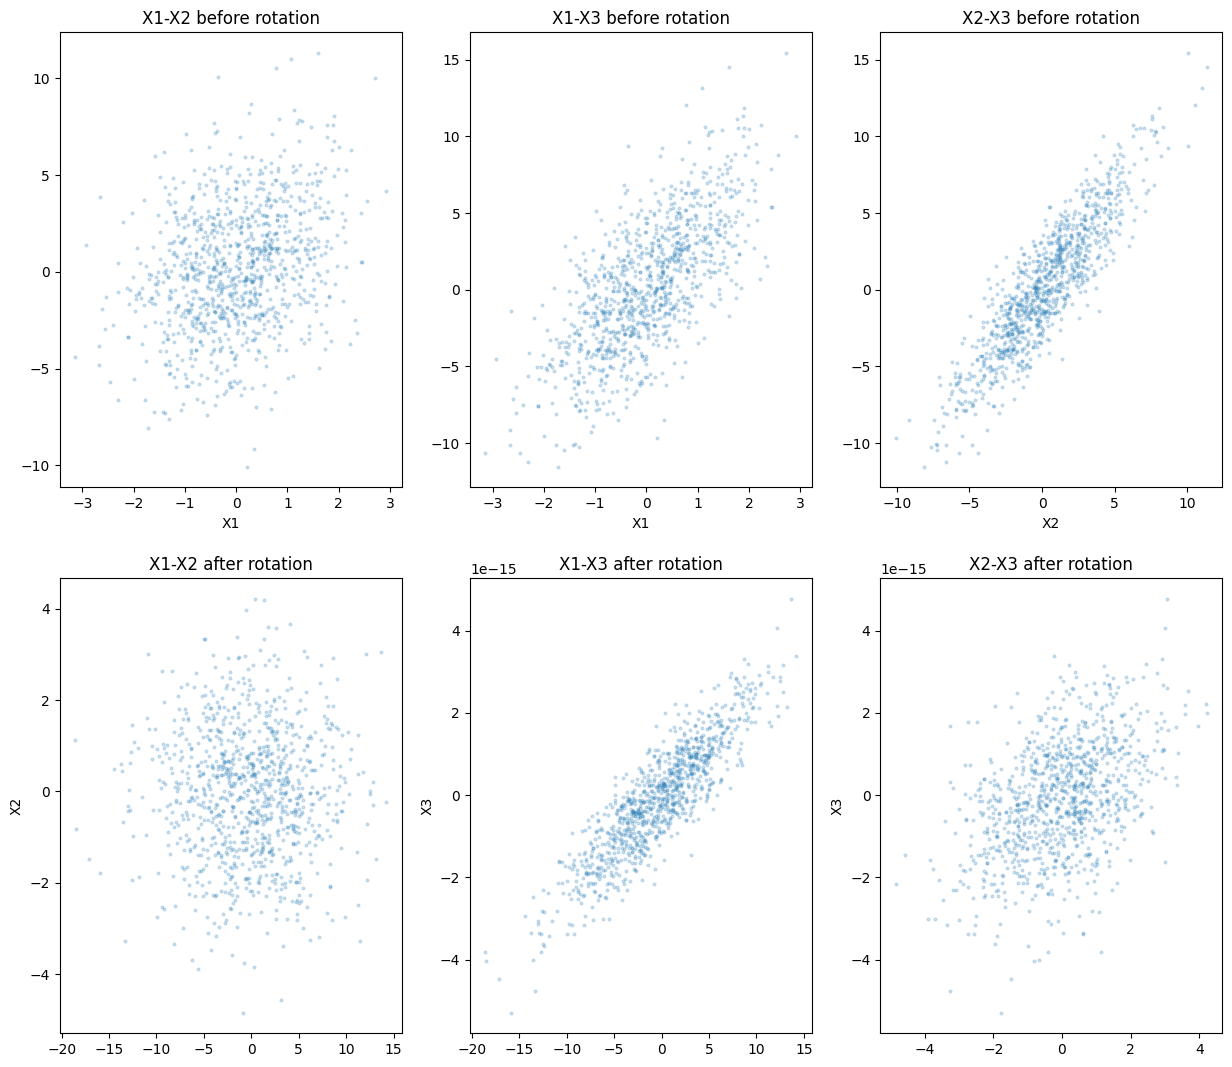

In [13]:
N = 1000

x1 = npr.normal(loc = 0, scale=1, size=N)
x2 = x1 + npr.normal(loc = 0, scale=3, size=N)
x3 = 2*x1 + x2

data = [x1,x2,x3]
X = np.array(data)
X

#finding the eigenvalues and the eigenvectors
cov = np.cov(X)
print("Covariance X: \n", cov, '\n') 
l, V = la.eig(cov)
print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

#finding the eigenvalues and the eigenvectors with SVD
U, S, Vt = la.svd(X)
print("U:\n", U, '\n')
print("S:\n", S, '\n')
print("V transpose:\n", Vt, '\n')

#What percent of the total dataset's variability is explained by the principal components? 
#Given how the dataset was constructed, do these make sense? 
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained

print(f"{round((S[0]/np.sum(S)),2)*100}% of the total dataset's variability is explained by the principal components")
print(f"{round((S[1]/np.sum(S))*100,2)}% of the total dataset's variability is explained by the principal components")
print(f"{round((S[2]/np.sum(S))*100,2)}% of the total dataset's variability is explained by the principal components")
print("If we consider two features we obtain: ", (S[0]/np.sum(S))*100 + (S[1]/np.sum(S))*100 )

# rotate all the data points accordingly to the new base 
Xp = np.dot(U.T, X)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (15,13))
#X1-X2
axs[0,0].scatter(X[0], X[1], alpha = 0.2, s = 4)
axs[1,0].scatter(Xp[0], Xp[1], alpha = 0.2, s = 4)
axs[0,0].set_title("X1-X2 before rotation")
axs[1,0].set_title("X1-X2 after rotation")
axs[0,0].set_xlabel("X1")
axs[1,0].set_ylabel("X2")
axs[0,0].set_xlabel("X1")
axs[1,0].set_ylabel("X2")
#X1-X3
axs[0,1].scatter(X[0], X[2], alpha = 0.2, s = 4)
axs[1,1].scatter(Xp[0], Xp[2], alpha = 0.2, s = 4)
axs[0,1].set_title("X1-X3 before rotation")
axs[1,1].set_title("X1-X3 after rotation")
axs[0,1].set_xlabel("X1")
axs[1,1].set_ylabel("X3")
axs[0,1].set_xlabel("X1")
axs[1,1].set_ylabel("X3")
#X2-X3
axs[0,2].scatter(X[1], X[2], alpha = 0.2, s = 4)
axs[1,2].scatter(Xp[1], Xp[2], alpha = 0.2, s = 4)
axs[0,2].set_title("X2-X3 before rotation")
axs[1,2].set_title("X2-X3 after rotation")
axs[0,2].set_xlabel("X2")
axs[1,2].set_ylabel("X3")
axs[0,2].set_xlabel("X2")
axs[1,2].set_ylabel("X3")

plt.show()


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

cov_nariance X: 
 [[ 0.9931515   0.90531107  2.89351481]
 [ 0.90531107 10.22652484 12.0742789 ]
 [ 2.89351481 12.0742789  17.927483  ]] 

Eigenvalues:
 [2.70668205e+01+0.j 4.17107911e-03+0.j 2.07616777e+00+0.j] 

Eigenvectors:
 [[-0.10957943 -0.81701782  0.56610444]
 [-0.58306618 -0.40841767 -0.70230252]
 [-0.80500073  0.40703426  0.43162128]] 



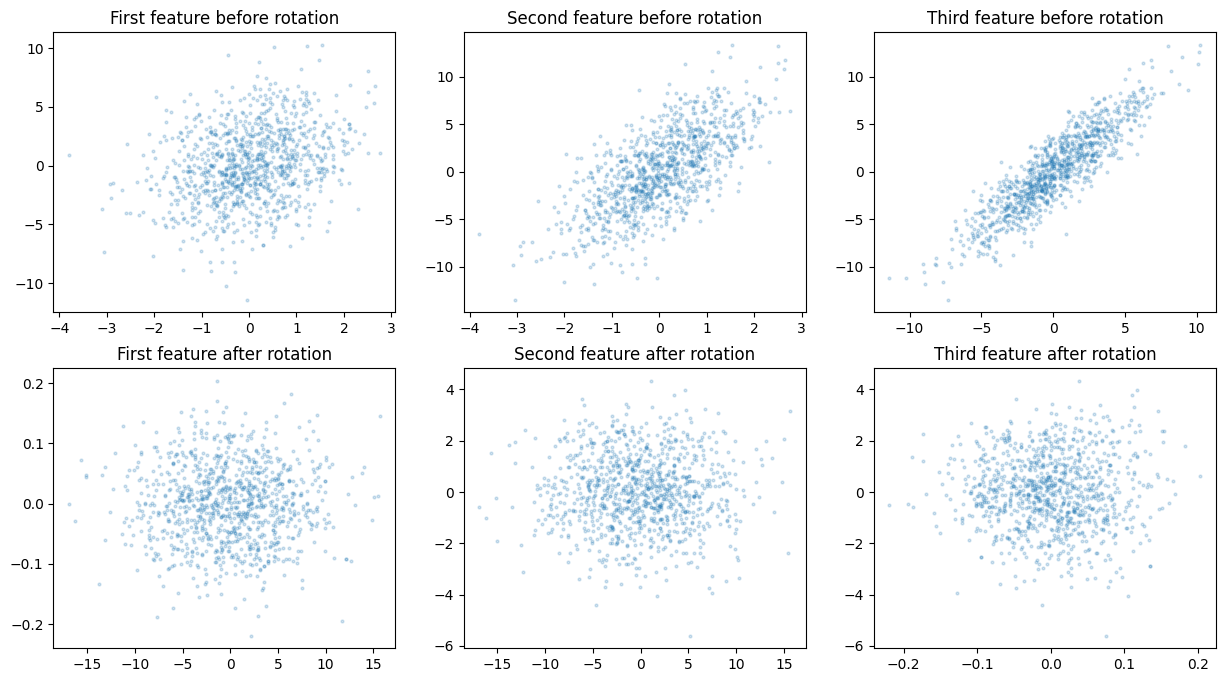

In [4]:
noise = np.random.normal(loc=0, scale=0.02, size=(3, N, 10))
#print(noise)
#print("0 \n",np.sum(noise, axis=0))
#print("1 \n",np.sum(noise, axis=1))
#print("2 \n",np.sum(noise, axis=2))
Xn = X + np.sum(noise,axis=2)

#finding the eigenvalues and the eigenvectors
cov_n = np.cov(Xn)
print("cov_nariance X: \n", cov_n, '\n') 
l_n, V_n = la.eig(cov_n)
print("Eigenvalues:\n", l_n, '\n')
print("Eigenvectors:\n", V_n, '\n')

#finding the eigenvalues and the eigenvectors with SVD
U_n, S_n, Vt_n = la.svd(cov_n)
# print("U:\n", U_n, '\n')
# print("S:\n", S_n, '\n')
# print("V transpose:\n", Vt, '\n')

# rotate all the data points accordingly to the new base 
Xpn = np.dot(V_n.T, Xn)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (15,8))
#First feature
axs[0,0].scatter(Xn[0], Xn[1], alpha = 0.2, s = 4)
axs[1,0].scatter(Xpn[0], Xpn[1], alpha = 0.2, s = 4)
axs[0,0].set_title("First feature before rotation")
axs[1,0].set_title("First feature after rotation")
#Second feature
axs[0,1].scatter(Xn[0], Xn[2], alpha = 0.2, s = 4)
axs[1,1].scatter(Xpn[0], Xpn[2], alpha = 0.2, s = 4)
axs[0,1].set_title("Second feature before rotation")
axs[1,1].set_title("Second feature after rotation")
#Third feature
axs[0,2].scatter(Xn[1], Xn[2], alpha = 0.2, s = 4)
axs[1,2].scatter(Xpn[1], Xpn[2], alpha = 0.2, s = 4)
axs[0,2].set_title("Third feature before rotation")
axs[1,2].set_title("Third feature after rotation")

plt.show()


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [5]:
# get the dataset and its description on the proper data directory
wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', out = './data')
wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names', out = './data') 

FileNotFoundError: [Errno 2] No such file or directory: ' (1)./data'

In [ ]:
f_name = './data/magic04.data'

data = pd.read_csv(f_name, header=None)
#data

X = data.to_numpy()
X = X[0:,0:10]
X = np.asarray(X,dtype='float32')

cov = np.cov(X)#Covariance matrix

#Finding the eigenvalues and eigenvectors
l , V = la.eig(cov)
l = np.real_if_close(l)# take only the real component, if possible

Xp = np.dot(V.T, X)

Lambda = np.diag(l)
for i in range(3):
    print(f"By selecting the component {i} , we retain {(Lambda[0, i]/Lambda.trace())} of the total variability")


By selecting the component 0 , we retain 0.9228463285679516 of the total variability
By selecting the component 1 , we retain 0.0 of the total variability
By selecting the component 2 , we retain 0.0 of the total variability
